In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("MagicBricks.csv")

In [5]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [25]:
 df['Per_Sqft']= df["Price"] / df["Area"]

In [27]:
df.isna().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [29]:
df.Parking.unique()

array([  1.,   5.,   2.,  nan,   4.,   9.,   3.,  39.,  10., 114.])

In [42]:
mode_parking = df['Parking'].mode()[0]

df['Parking'].fillna(mode_parking, inplace=True)

C:\Users\91630\AppData\Local\Temp\ipykernel_15764\1138979300.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parking'].fillna(mode_parking, inplace=True)


In [44]:
df.isna().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

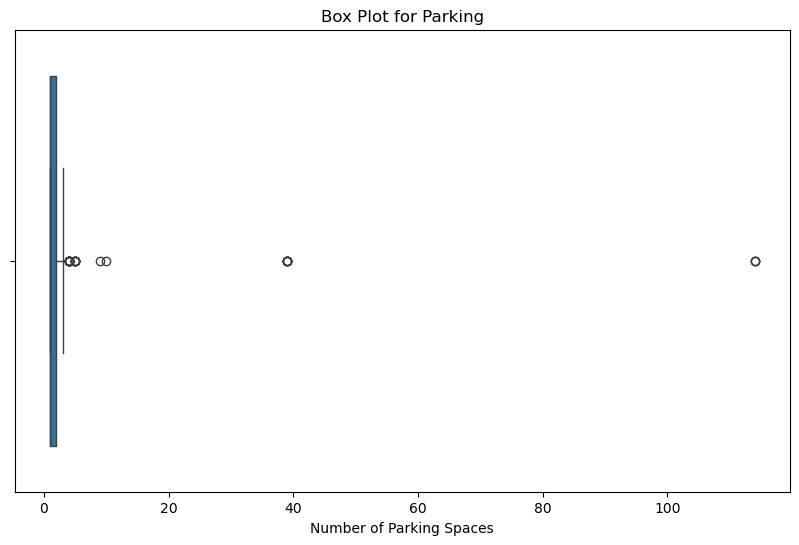

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Parking'])
plt.title('Box Plot for Parking')
plt.xlabel('Number of Parking Spaces')
plt.show()

In [35]:
Q1 = df['Parking'].quantile(0.25)
Q3 = df['Parking'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Parking'] < lower_bound) | (df['Parking'] > upper_bound)]
print("Outliers:\n", outliers)



Outliers:
          Area  BHK  Bathroom      Furnishing  \
21     900.00    3       2.0  Semi-Furnished   
39    1710.00    3       3.0  Semi-Furnished   
122   1710.00    3       3.0  Semi-Furnished   
123   1350.00    2       2.0       Furnished   
225   5025.00    5       6.0     Unfurnished   
242   6000.00    5       5.0  Semi-Furnished   
255   8150.00    4       5.0     Unfurnished   
298   3000.00    4       5.0  Semi-Furnished   
328   1053.00    3       2.0       Furnished   
477   3500.00    4       4.0  Semi-Furnished   
495   5025.00    5       6.0     Unfurnished   
543   3000.00    4       5.0  Semi-Furnished   
571   1500.00    3       3.0  Semi-Furnished   
788   1175.00    3       3.0     Unfurnished   
789   1500.00    3       3.0     Unfurnished   
790    810.00    2       2.0     Unfurnished   
806    765.00    2       2.0     Unfurnished   
822   1080.00    3       3.0     Unfurnished   
823   1170.00    3       3.0     Unfurnished   
875    365.00    1       1.0 

#capping 

In [48]:
df['Parking'] = np.where(df['Parking'] > upper_bound, upper_bound, df['Parking'])
df['Parking'] = np.where(df['Parking'] < lower_bound, lower_bound, df['Parking'])

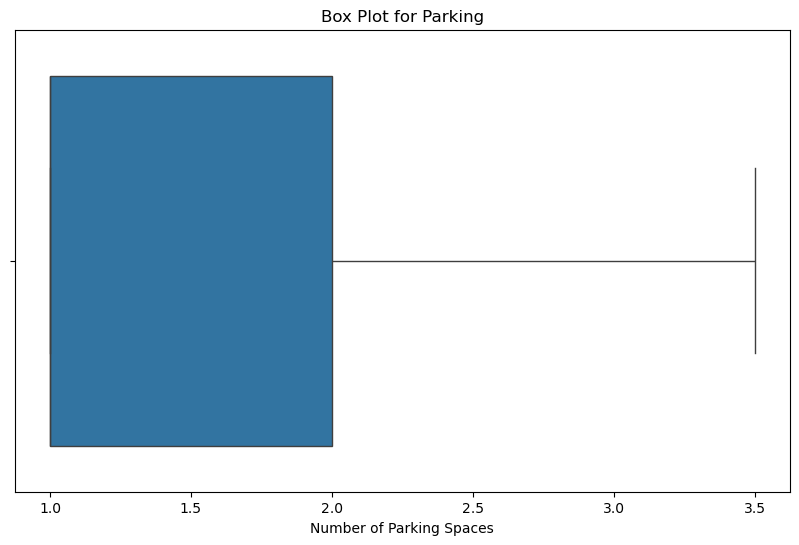

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Parking'])
plt.title('Box Plot for Parking')
plt.xlabel('Number of Parking Spaces')
plt.show()

In [57]:
df.isna().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [59]:
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)


C:\Users\91630\AppData\Local\Temp\ipykernel_15764\3172194884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
C:\Users\91630\AppData\Local\Temp\ipykernel_15764\3172194884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [61]:
df.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [ ]:
#basic statistics for numerical features.

In [63]:
df.describe() 

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,1466.452724,2.796664,2.555203,1.426132,2.130670e+07,14582.160714
std,1568.055040,0.954425,1.041627,0.659485,2.560115e+07,20420.174533
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,204.081633
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6757.352941
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11666.666667
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,17549.707602
max,24300.000000,10.000000,7.000000,3.500000,2.400000e+08,538461.538462


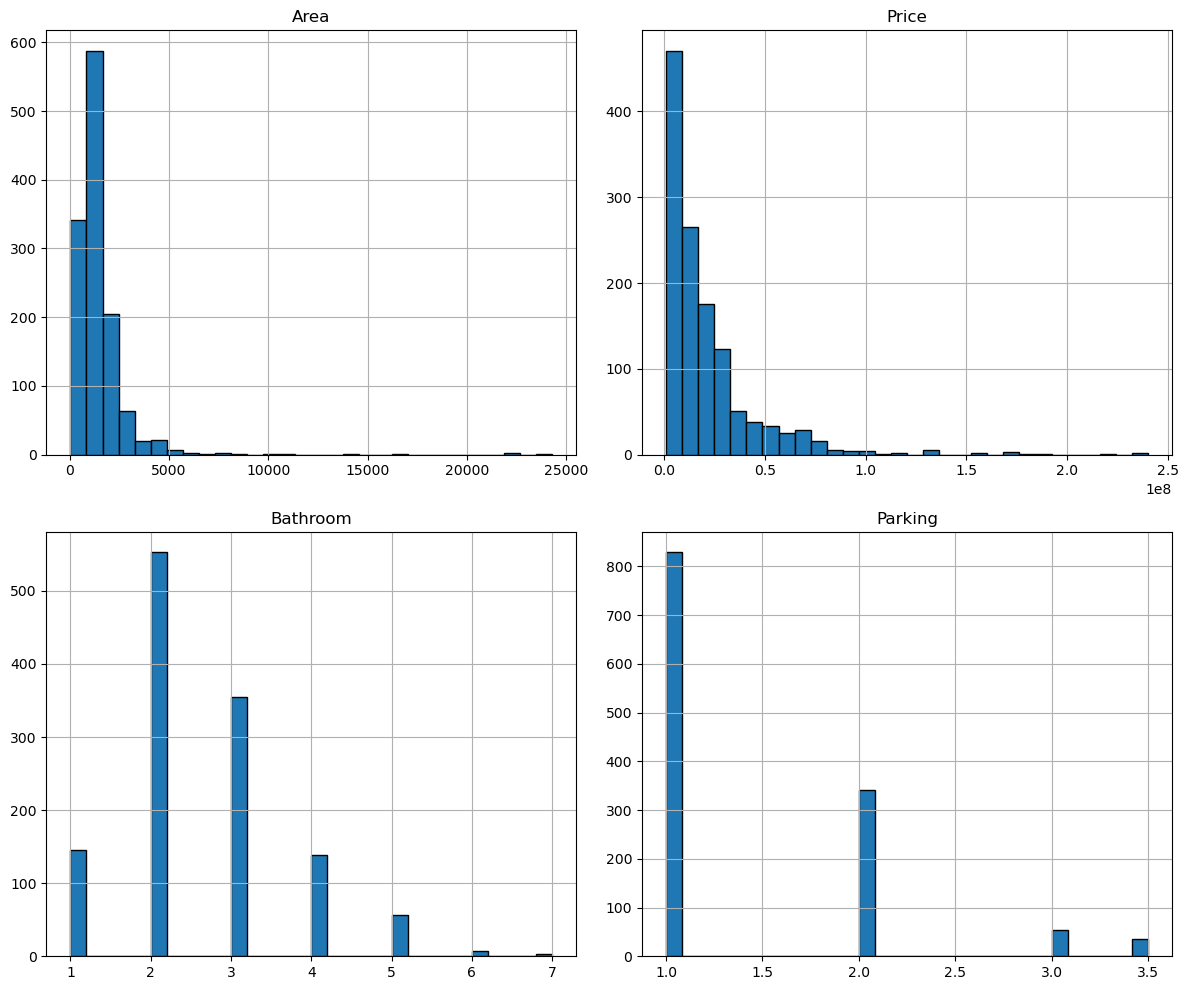

In [79]:
df[['Area', 'Price', 'Bathroom', 'Parking']].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

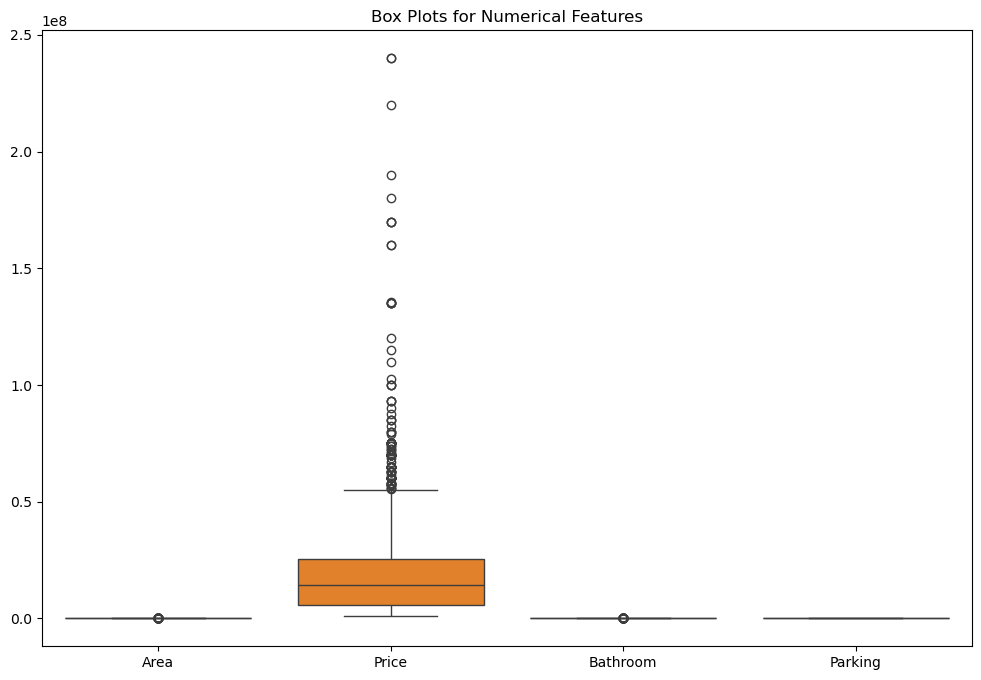

In [81]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Area', 'Price', 'Bathroom', 'Parking']])
plt.title('Box Plots for Numerical Features')
plt.show()

In [83]:
df.Price.max()

240000000

In [85]:
df_sorted = df.sort_values(by='Price', ascending=False)
top_n = 10
top_price_records = df_sorted.head(top_n)

print(top_price_records)


         Area  BHK  Bathroom      Furnishing  \
57     8000.0    4       5.0  Semi-Furnished   
109    8000.0    4       5.0  Semi-Furnished   
242    6000.0    5       5.0  Semi-Furnished   
1210   6500.0    4       5.0     Unfurnished   
1202   6000.0    5       5.0  Semi-Furnished   
225    5025.0    5       6.0     Unfurnished   
495    5025.0    5       6.0     Unfurnished   
255    8150.0    4       5.0     Unfurnished   
585    5500.0    6       7.0       Furnished   
248   10350.0    4       7.0  Semi-Furnished   

                                               Locality  Parking      Price  \
57                                         Lajpat Nagar      1.0  240000000   
109                                        Lajpat Nagar      1.0  240000000   
242                   Maharani Bagh, New Friends Colony      3.5  220000000   
1210                          Mayfair garden, Hauz Khas      3.0  190000000   
1202  Hauz Khas Apartment, Hauz Khas Enclave, Hauz Khas      3.0  180000000 

In [87]:
price_threshold = df['Price'].quantile(0.90)  # 90th percentile

# Filter the records with prices above the threshold
high_price_records = df[df['Price'] > price_threshold]

In [96]:
# Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] > outlier_threshold_upper) | (df['Price'] < outlier_threshold_lower)]
print(outliers[['Price']])


          Price
50     57500000
57    240000000
94     57500000
109   240000000
209   135000000
...         ...
1224  110000000
1226  102500000
1227  100000000
1232   62500000
1245   60000000

[104 rows x 1 columns]


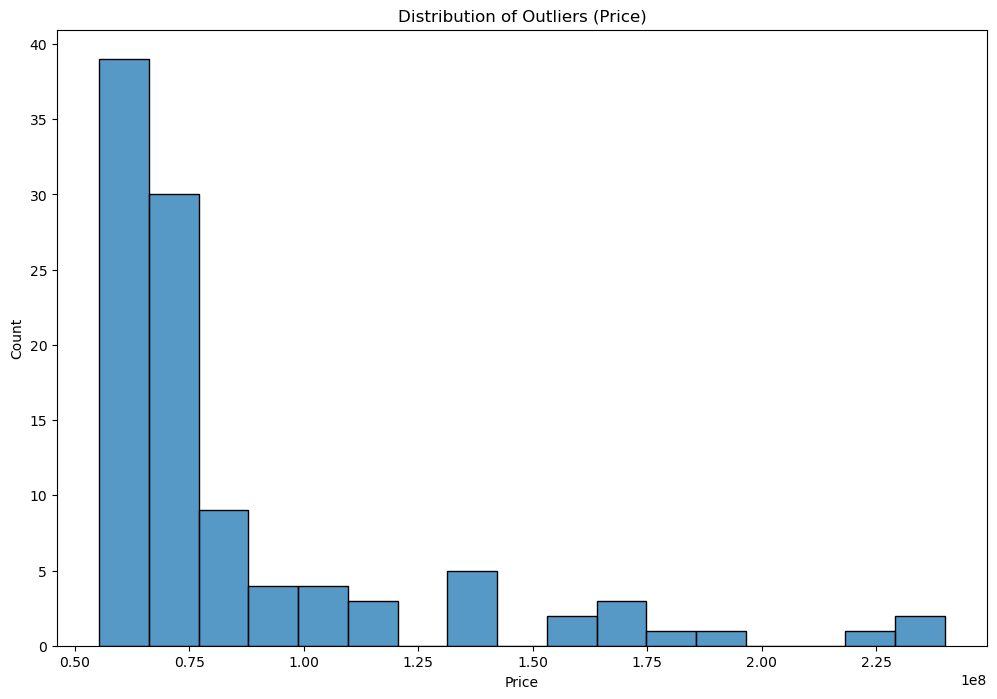

In [100]:
plt.figure(figsize=(12, 8))
sns.histplot(outliers['Price'])
plt.title('Distribution of Outliers (Price)')
plt.show()

In [111]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
p1 = df['Price'].quantile(0.25)
p3 = df['Price'].quantile(0.75)
IQR = p3 - p1

# Define the lower and upper bound for outliers
p_lower_bound = p1 - 1.5 * IQR
p_upper_bound = p3 + 1.5 * IQR

# Identify outliers
p_outliers = df[(df['Price'] < p_lower_bound) | (df['Price'] > p_upper_bound)]
print("Outliers:\n", p_outliers)


Outliers:
         Area  BHK  Bathroom      Furnishing  \
50    2925.0    4       4.0     Unfurnished   
57    8000.0    4       5.0  Semi-Furnished   
94    2925.0    4       4.0     Unfurnished   
109   8000.0    4       5.0  Semi-Furnished   
209   4688.0    5       4.0     Unfurnished   
...      ...  ...       ...             ...   
1224  5400.0    4       4.0     Unfurnished   
1226  2300.0    4       4.0  Semi-Furnished   
1227  2700.0    4       4.0  Semi-Furnished   
1232  2600.0    4       5.0  Semi-Furnished   
1245  2625.0    4       5.0  Semi-Furnished   

                               Locality  Parking      Price         Status  \
50                       Lajpat Nagar 3      2.0   57500000  Ready_to_move   
57                         Lajpat Nagar      1.0  240000000  Ready_to_move   
94                       Lajpat Nagar 3      2.0   57500000  Ready_to_move   
109                        Lajpat Nagar      1.0  240000000  Ready_to_move   
209   The Leela Sky Villas, Patel 

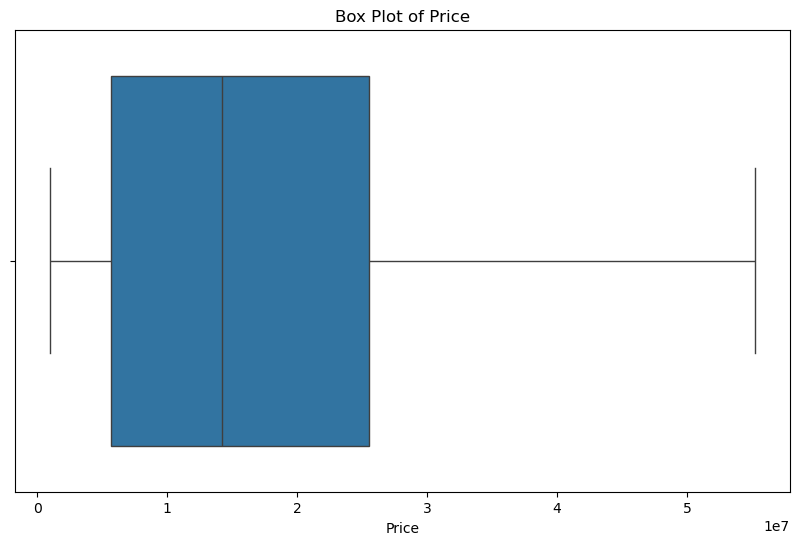

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

In [113]:
df['Price'] = np.where(df['Price'] > p_upper_bound, p_upper_bound, df['Price'])


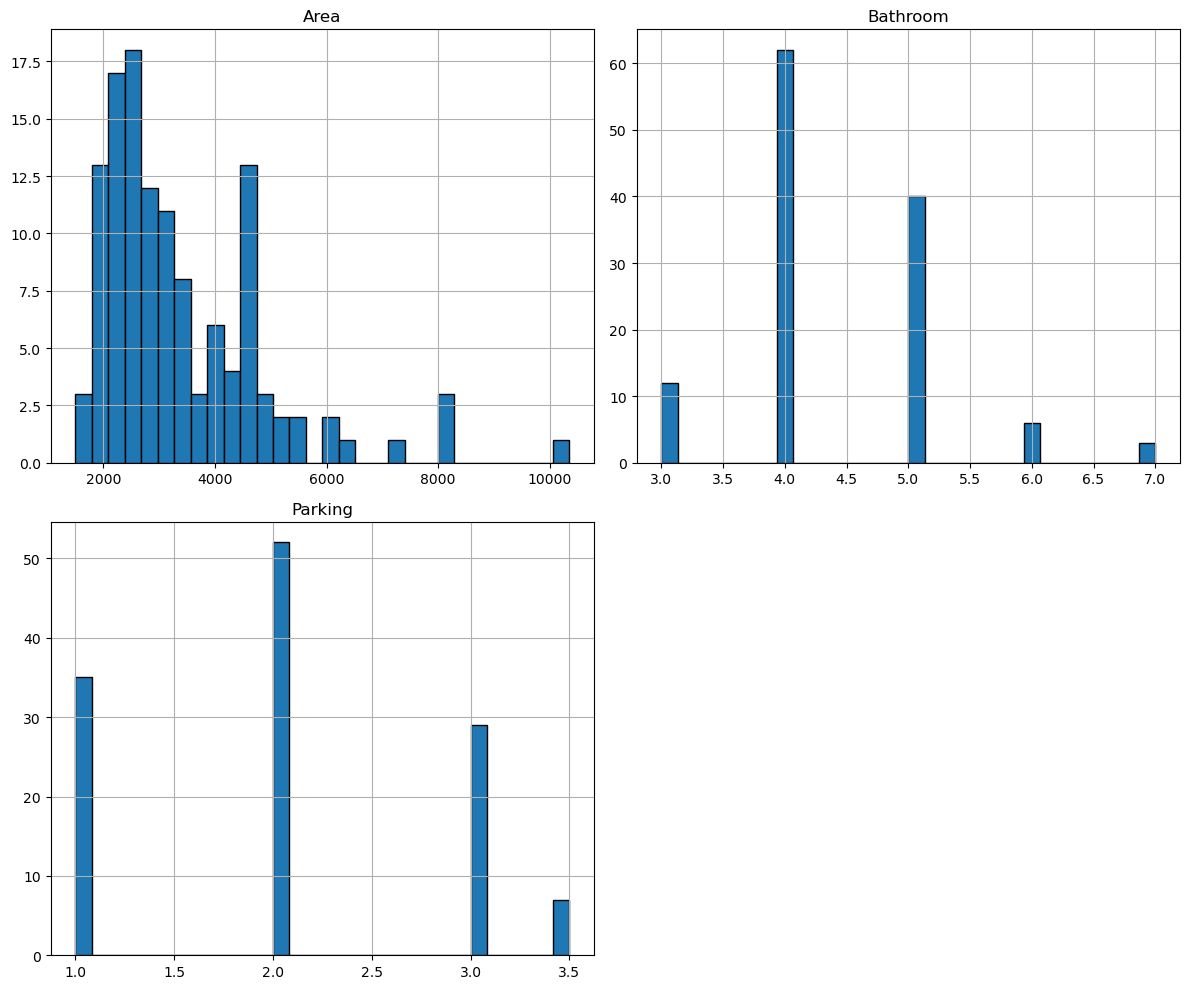

In [91]:
high_price_records[['Area', 'Bathroom', 'Parking']].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [69]:
print(df['Furnishing'].value_counts())
print(df['Type'].value_counts())


Furnishing
Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: count, dtype: int64
Type
Builder_Floor    666
Apartment        593
Name: count, dtype: int64


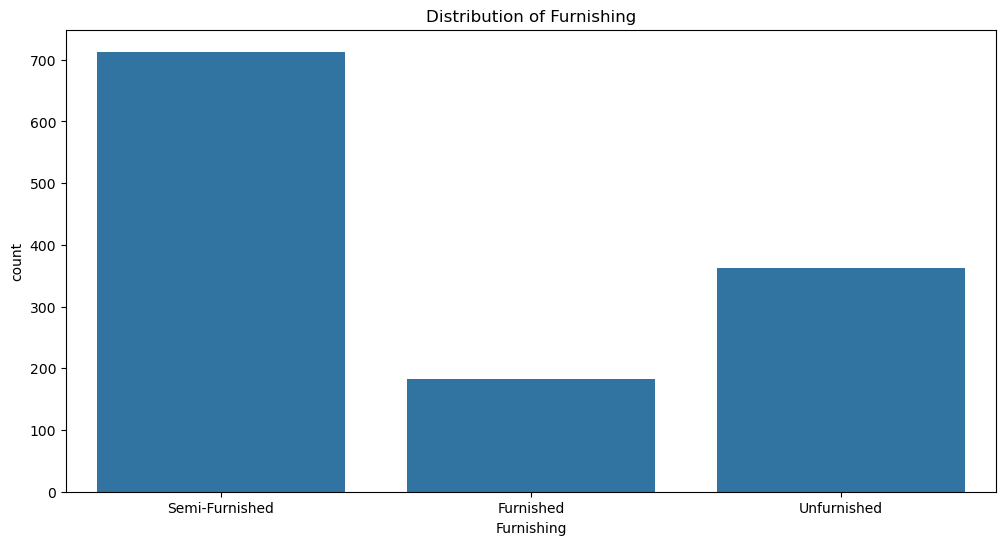

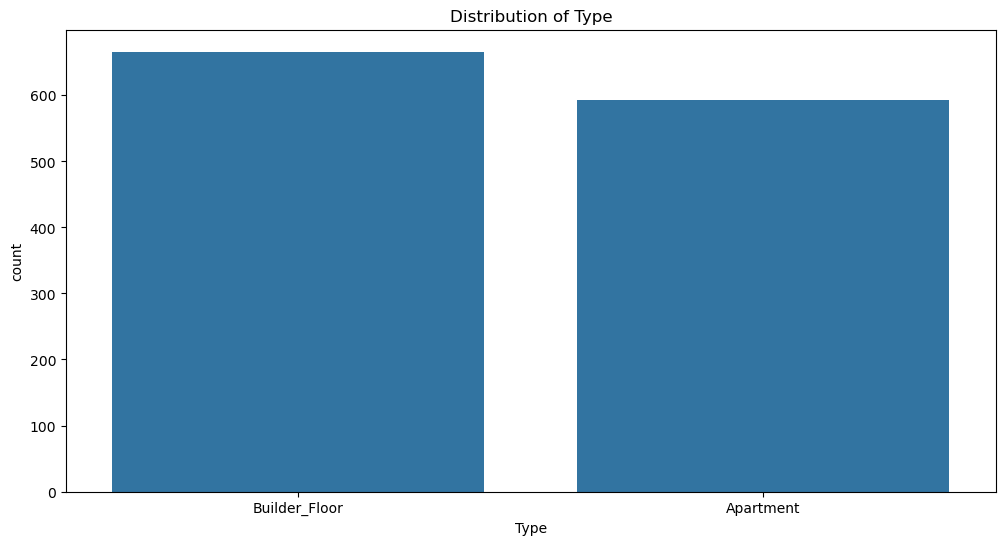

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Furnishing', data=df)
plt.title('Distribution of Furnishing')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Type')
plt.show()


In [118]:
#bi

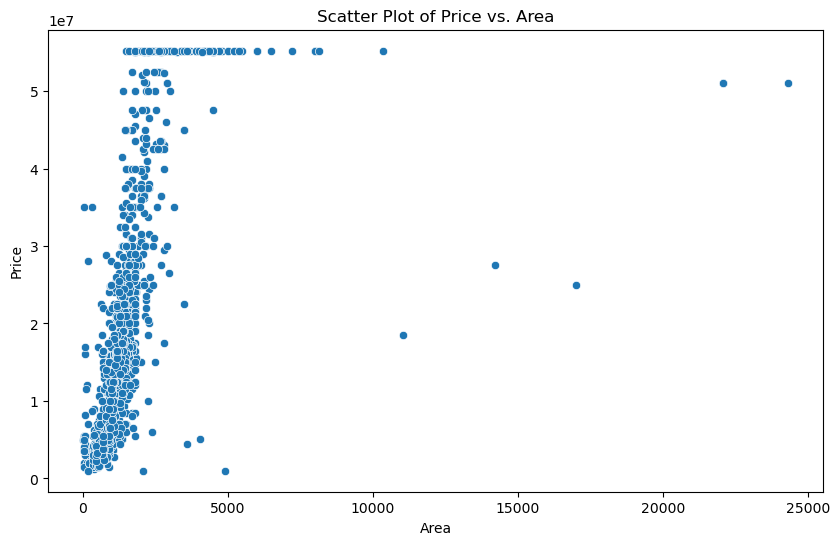

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

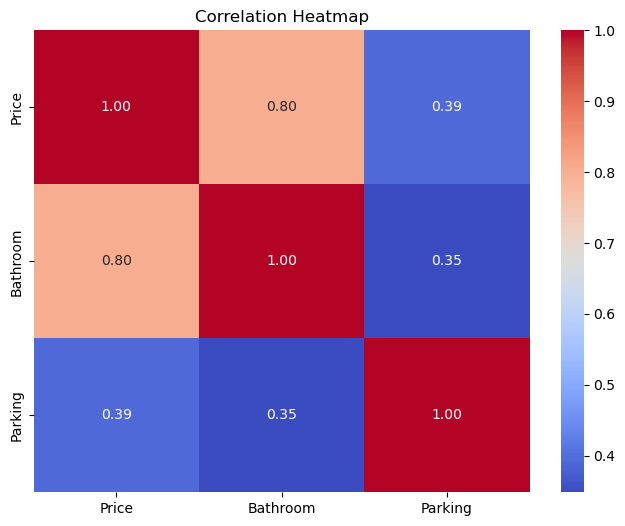

In [136]:
# Calculate correlation matrix
correlation_matrix = df[['Price', 'Bathroom', 'Parking']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


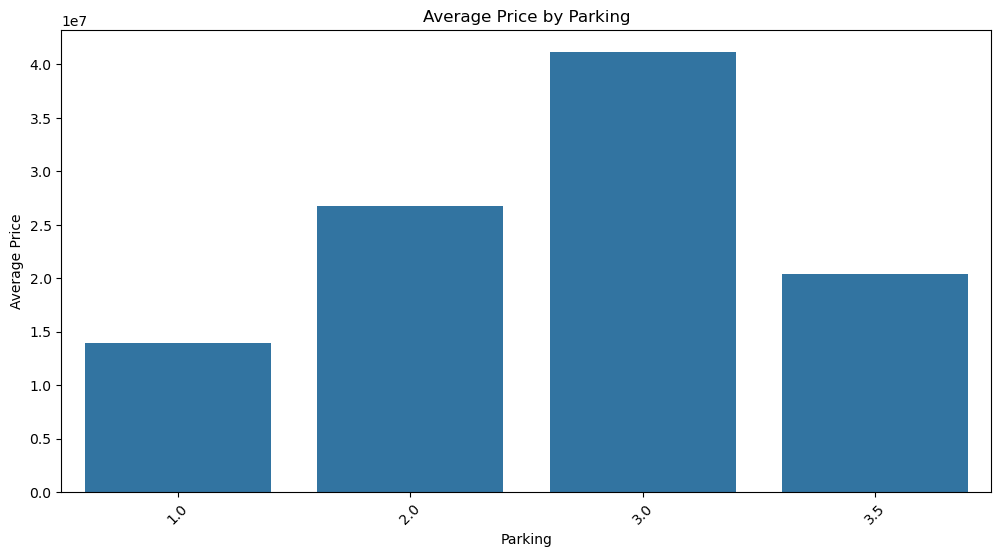

In [140]:
# Calculate average price for each parking category
average_price_by_parking = df.groupby('Parking')['Price'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_parking.index, y=average_price_by_parking.values)
plt.title('Average Price by Parking')
plt.xlabel('Parking')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


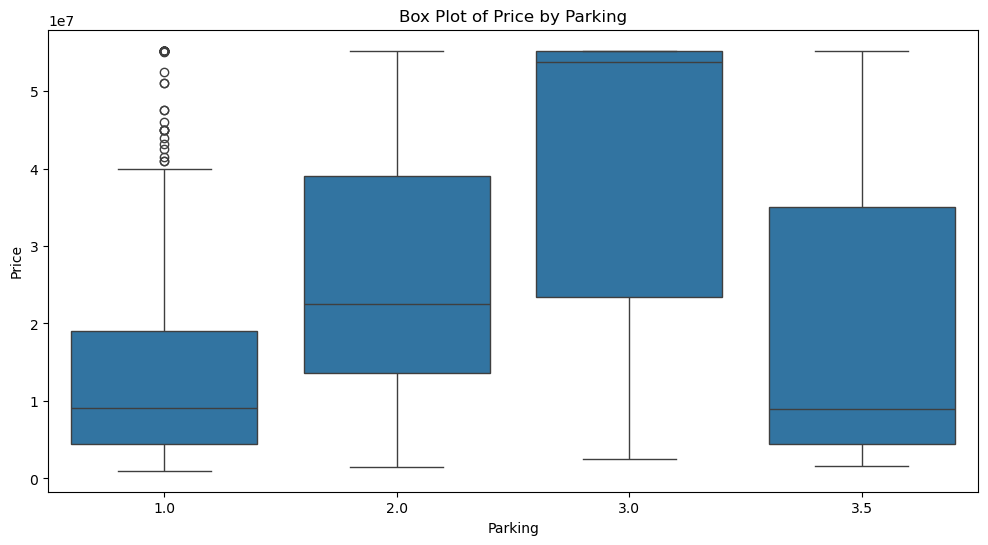

In [149]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Parking', y='Price', data=df)
plt.title('Box Plot of Price by Parking')
plt.xlabel('Parking')
plt.ylabel('Price')
plt.show()

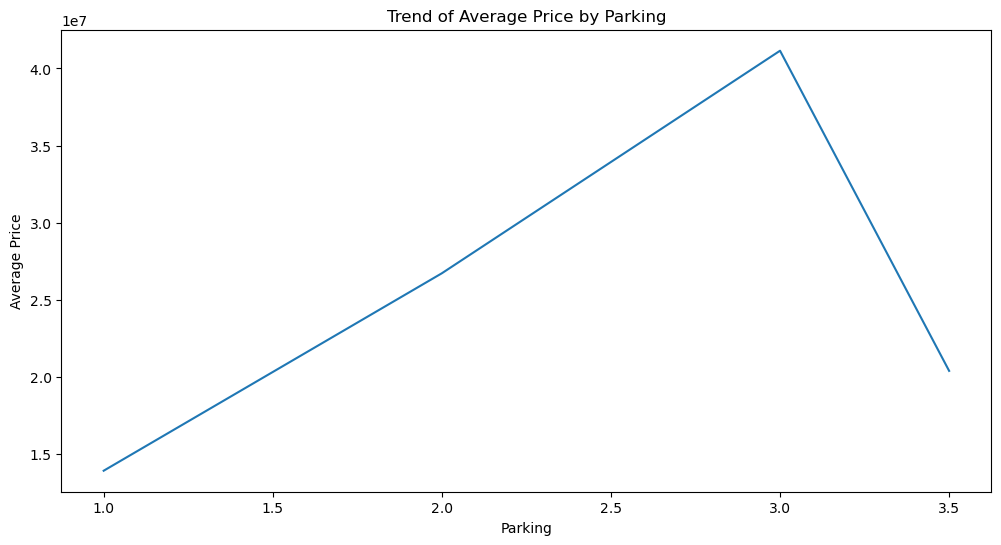

In [142]:
average_price_by_parking = df.groupby('Parking')['Price'].mean().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_price_by_parking.index, y=average_price_by_parking.values)
plt.title('Trend of Average Price by Parking')
plt.xlabel('Parking')
plt.ylabel('Average Price')
plt.show()


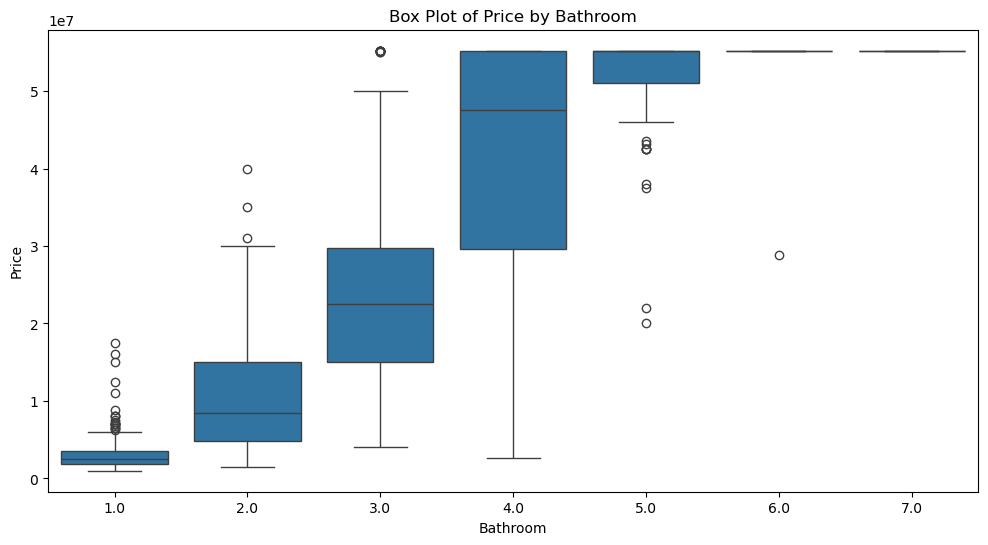

In [147]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bathroom', y='Price', data=df)
plt.title('Box Plot of Price by Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()

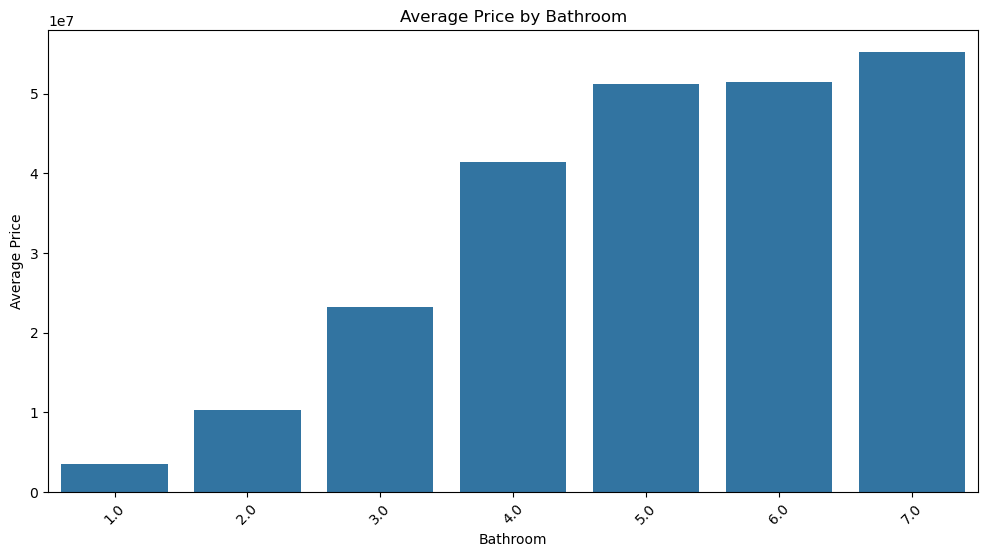

In [153]:
average_price_by_bathroom = df.groupby('Bathroom')['Price'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_bathroom.index, y=average_price_by_bathroom.values)
plt.title('Average Price by Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

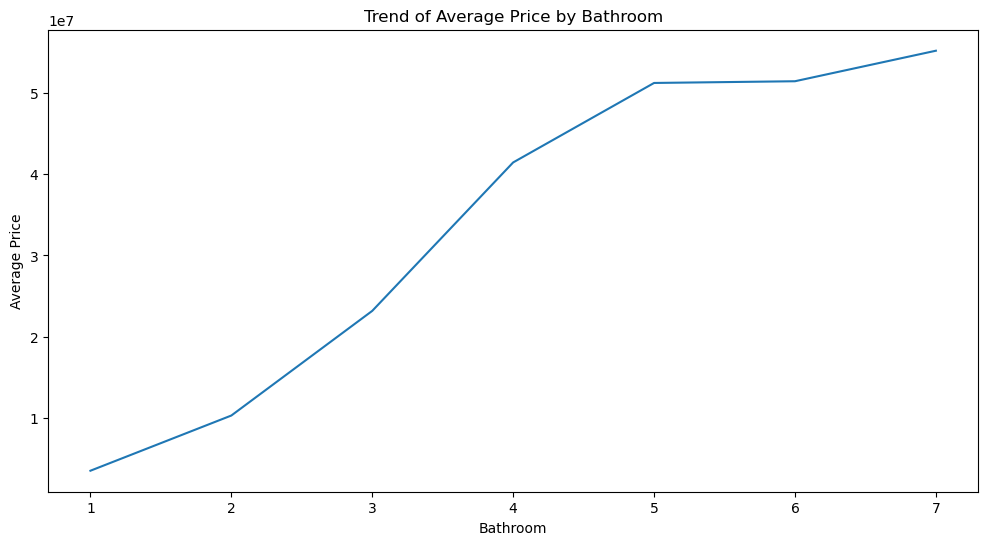

In [155]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_price_by_bathroom.index, y=average_price_by_bathroom.values)
plt.title('Trend of Average Price by Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Average Price')
plt.show()

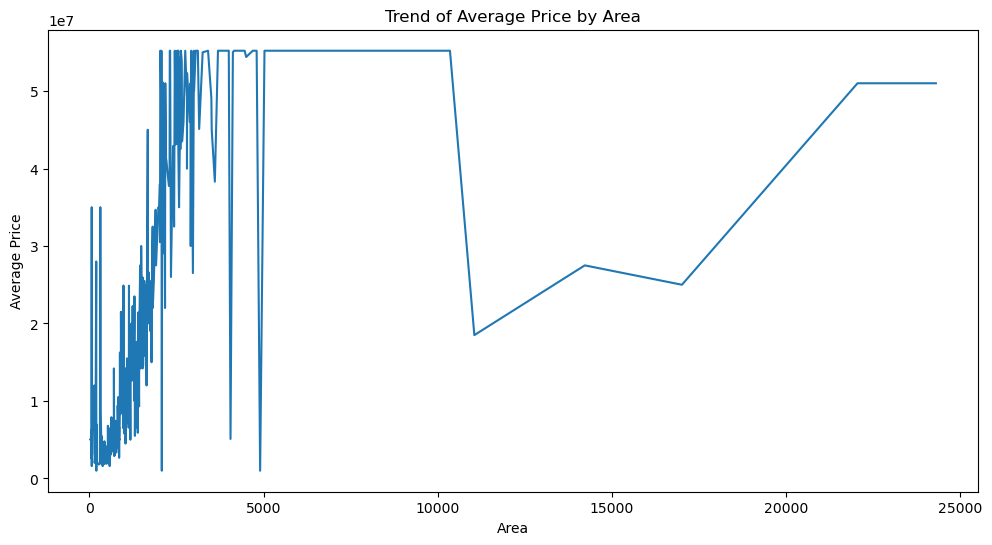

In [157]:
average_price_by_area = df.groupby('Area')['Price'].mean().sort_index()

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_price_by_area.index, y=average_price_by_area.values)
plt.title('Trend of Average Price by Area')
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.show()

C:\Users\91630\AppData\Local\Temp\ipykernel_15764\1682919781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_status.index, y=average_price_by_status.values, palette='viridis')


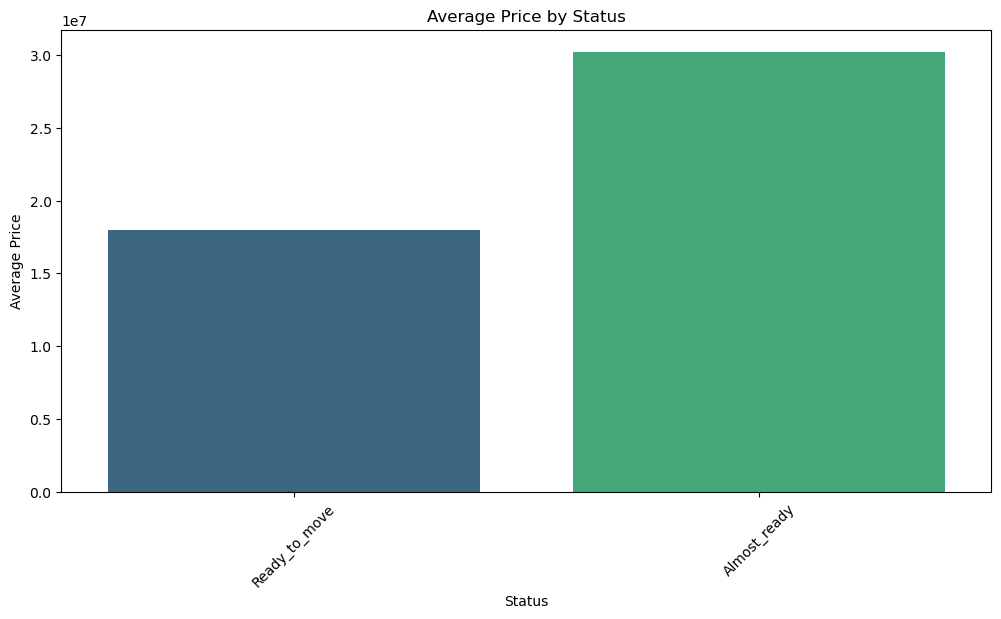

In [164]:
average_price_by_status = df.groupby('Status')['Price'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_status.index, y=average_price_by_status.values, palette='viridis')
plt.title('Average Price by Status')
plt.xlabel('Status')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\91630\AppData\Local\Temp\ipykernel_15764\2168764409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_transaction.index, y=average_price_by_transaction.values, palette='viridis')


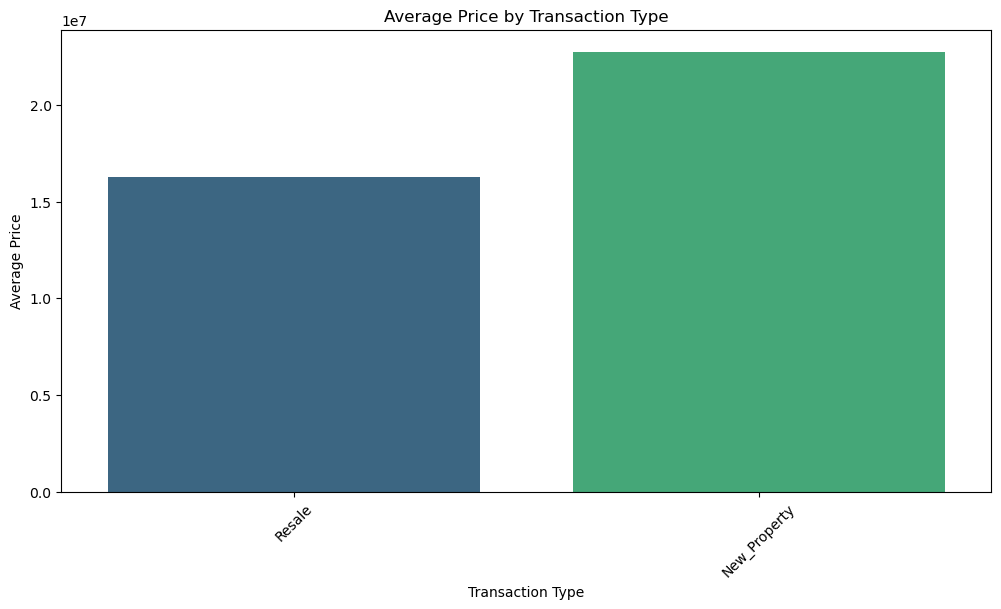

In [166]:
average_price_by_transaction = df.groupby('Transaction')['Price'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_transaction.index, y=average_price_by_transaction.values, palette='viridis')
plt.title('Average Price by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

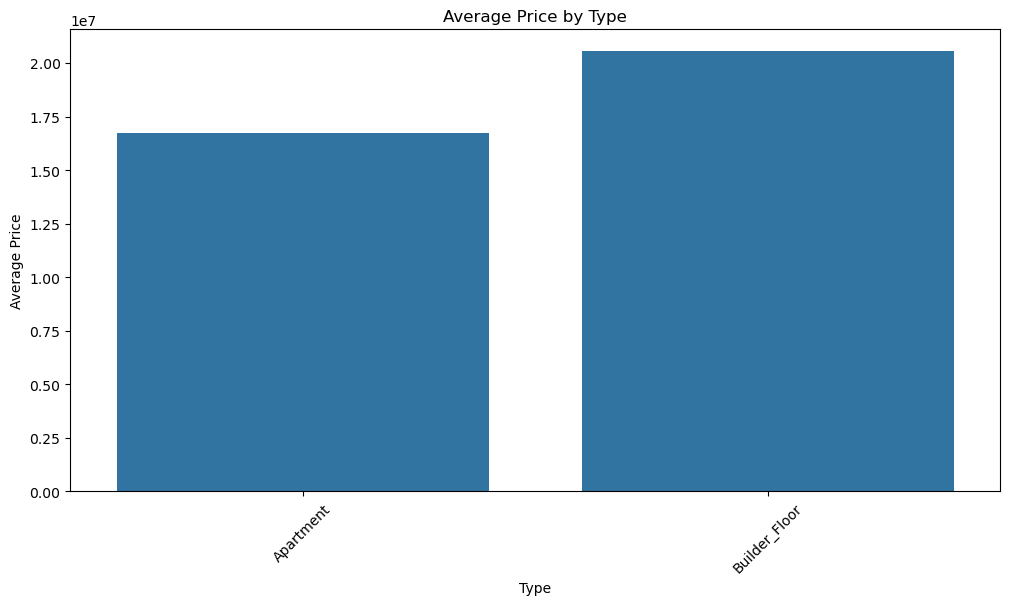

In [159]:
average_price_by_type = df.groupby('Type')['Price'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_type.index, y=average_price_by_type.values)
plt.title('Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\91630\AppData\Local\Temp\ipykernel_15764\4212814500.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_furnishing.index, y=average_price_by_furnishing.values, palette='viridis')


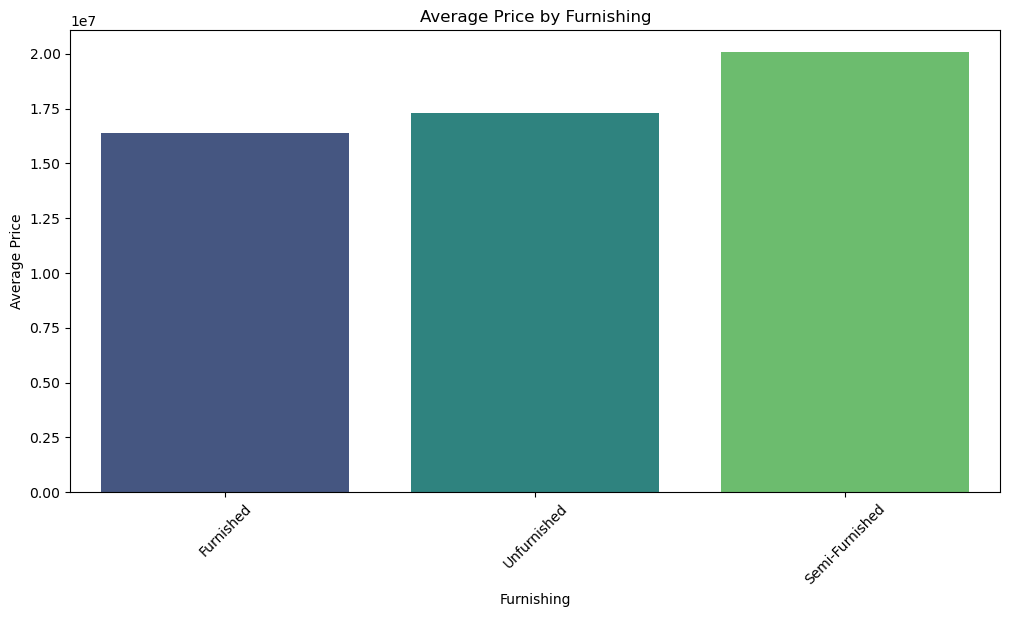

In [172]:
average_price_by_furnishing = df.groupby('Furnishing')['Price'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_furnishing.index, y=average_price_by_furnishing.values, palette='viridis')
plt.title('Average Price by Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\91630\AppData\Local\Temp\ipykernel_15764\1345849275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Furnishing', y='Price', data=df, palette='viridis')


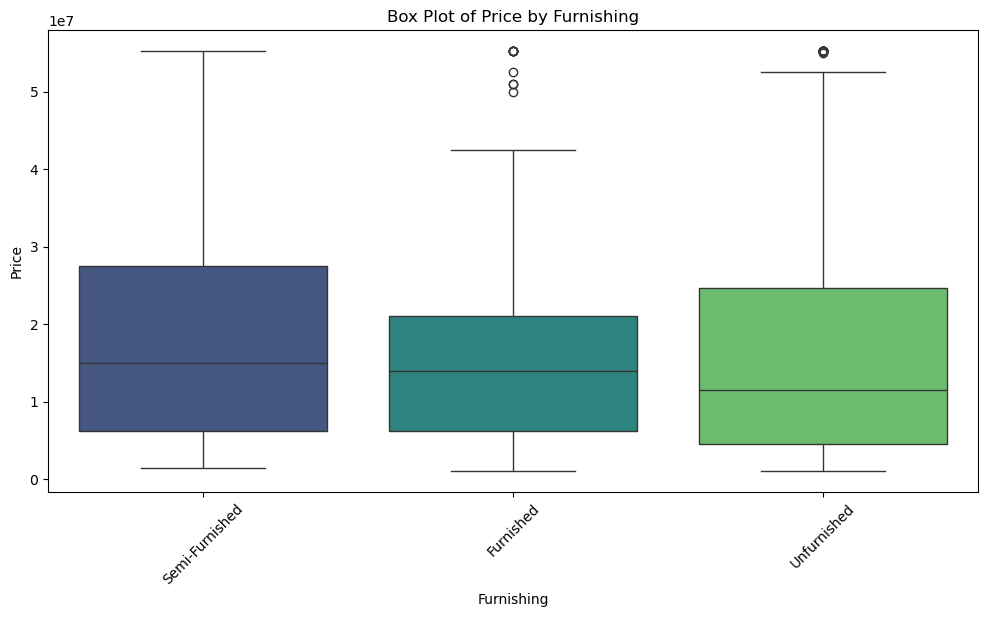

In [174]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Furnishing', y='Price', data=df, palette='viridis')
plt.title('Box Plot of Price by Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [176]:
#multi

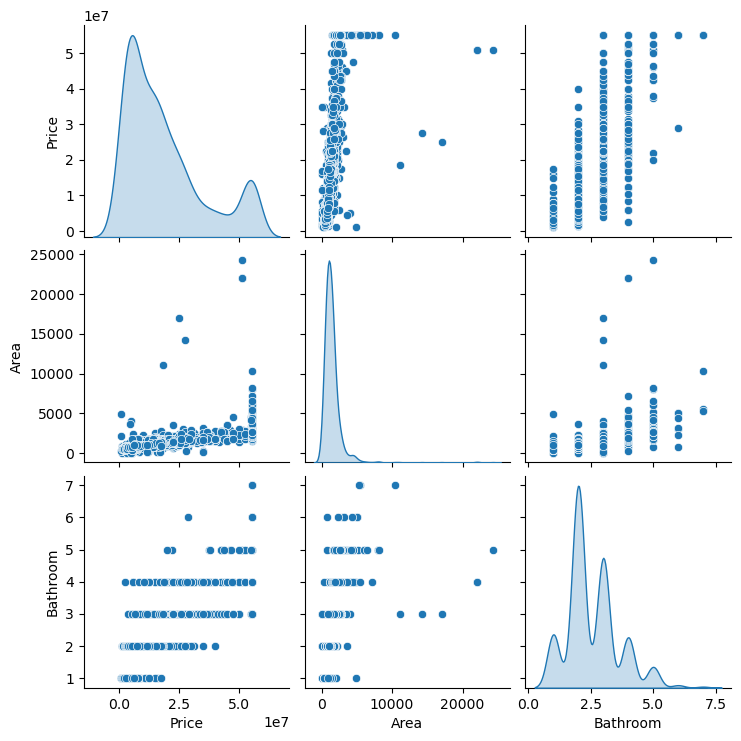

In [178]:
sns.pairplot(df[['Price', 'Area', 'Bathroom']], diag_kind='kde')
plt.show()

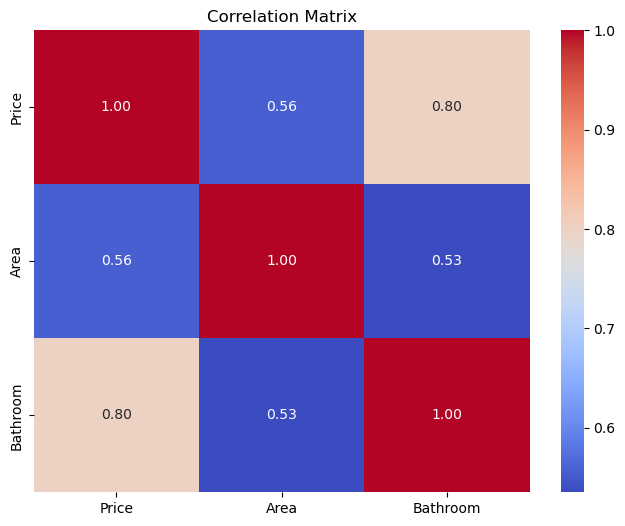

In [180]:
correlation_matrix = df[['Price', 'Area', 'Bathroom']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
"""  
prices have wide range,
"""

In [73]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [ ]:
1.Data 
2.Data Preprocessing
3.univariate analysis
4.bivariate analysis

In [67]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,9538.461538
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,13355.998057
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,11904.761905
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,20000.000000
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,11616.161616
